In [25]:
import nltk

# Check if 'movie_reviews' corpus is available, download if not.
try:
    nltk.data.find('corpora/movie_reviews')
except nltk.downloader.DownloadError:
    nltk.download('movie_reviews')

from nltk.corpus import movie_reviews
print("NLTK movie_reviews corpus ready.")

NLTK movie_reviews corpus ready.


In [26]:
import nltk

# Download the movie_reviews corpus if not already present
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

# Load file IDs for positive and negative reviews
pos_fileids = movie_reviews.fileids('pos')
neg_fileids = movie_reviews.fileids('neg')

# Load raw text for positive and negative reviews
pos_reviews = [movie_reviews.raw(fileid) for fileid in pos_fileids]
neg_reviews = [movie_reviews.raw(fileid) for fileid in neg_fileids]

print(f"Loaded {len(pos_reviews)} positive reviews and {len(neg_reviews)} negative reviews.")

Loaded 1000 positive reviews and 1000 negative reviews.


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [27]:
import nltk

# Download necessary NLTK data: punkt for tokenization, stopwords for stop word removal
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Create a set of English stop words for efficient lookup
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Tokenizes text, converts to lowercase, and removes non-alphabetic characters and stop words."""
    # Tokenize and convert to lowercase
    tokens = word_tokenize(text.lower())
    # Remove non-alphabetic tokens and stop words
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

# Preprocess positive and negative reviews
preprocessed_pos_reviews = [preprocess_text(review) for review in pos_reviews]
preprocessed_neg_reviews = [preprocess_text(review) for review in neg_reviews]

print(f"Preprocessed {len(preprocessed_pos_reviews)} positive reviews.")
print(f"Preprocessed {len(preprocessed_neg_reviews)} negative reviews.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessed 1000 positive reviews.
Preprocessed 1000 negative reviews.


In [28]:
# Convert lists of preprocessed tokens back into space-separated strings
# This format is required for the TfidfVectorizer.
preprocessed_pos_reviews_str = [" ".join(tokens) for tokens in preprocessed_pos_reviews]
preprocessed_neg_reviews_str = [" ".join(tokens) for tokens in preprocessed_neg_reviews]

print(f"Converted {len(preprocessed_pos_reviews_str)} positive reviews to strings.")
print(f"Converted {len(preprocessed_neg_reviews_str)} negative reviews to strings.")

Converted 1000 positive reviews to strings.
Converted 1000 negative reviews to strings.


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with a limited number of features
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting features to manage dimensionality and focus on most important terms

# Fit the vectorizer on positive reviews and transform them
tfidf_pos_features = tfidf_vectorizer.fit_transform(preprocessed_pos_reviews_str)

# Transform negative reviews using the *same* vocabulary and IDF values learned from positive reviews
# This ensures consistent comparison between sentiments.
tfidf_neg_features = tfidf_vectorizer.transform(preprocessed_neg_reviews_str)

print(f"TF-IDF features for positive reviews shape: {tfidf_pos_features.shape}")
print(f"TF-IDF features for negative reviews shape: {tfidf_neg_features.shape}")

TF-IDF features for positive reviews shape: (1000, 5000)
TF-IDF features for negative reviews shape: (1000, 5000)


In [30]:
# Get the list of feature names (words) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Calculate the sum of TF-IDF scores for each term across all positive reviews
sum_tfidf_pos = tfidf_pos_features.sum(axis=0)
# Convert the sparse matrix sum to a dense array
sum_tfidf_pos_array = sum_tfidf_pos.A[0]

# Get the indices of the top 15 terms with the highest TF-IDF scores for positive reviews
top_15_pos_indices = sum_tfidf_pos_array.argsort()[-15:][::-1]
# Create a list of (term, score) tuples for the top 15 positive terms
top_15_pos_terms = [(feature_names[i], sum_tfidf_pos_array[i]) for i in top_15_pos_indices]

# Calculate the sum of TF-IDF scores for each term across all negative reviews
sum_tfidf_neg = tfidf_neg_features.sum(axis=0)
# Convert the sparse matrix sum to a dense array
sum_tfidf_neg_array = sum_tfidf_neg.A[0]

# Get the indices of the top 15 terms with the highest TF-IDF scores for negative reviews
top_15_neg_indices = sum_tfidf_neg_array.argsort()[-15:][::-1]
# Create a list of (term, score) tuples for the top 15 negative terms
top_15_neg_terms = [(feature_names[i], sum_tfidf_neg_array[i]) for i in top_15_neg_indices]

print("Top 15 TF-IDF Terms for Positive Reviews:")
for term, score in top_15_pos_terms:
    print(f"- {term}: {score:.4f}")

print("\nTop 15 TF-IDF Terms for Negative Reviews:")
for term, score in top_15_neg_terms:
    print(f"- {term}: {score:.4f}")

Top 15 TF-IDF Terms for Positive Reviews:
- film: 61.2200
- movie: 39.1036
- one: 35.7037
- like: 25.1034
- story: 20.9846
- good: 20.4125
- also: 19.4608
- time: 19.1671
- life: 19.0463
- even: 18.5937
- would: 18.4215
- character: 18.3169
- characters: 18.2346
- well: 17.8985
- much: 17.6231

Top 15 TF-IDF Terms for Negative Reviews:
- film: 62.2575
- movie: 57.2288
- one: 39.5250
- like: 32.8485
- bad: 32.3943
- even: 27.0057
- would: 25.0750
- plot: 23.9729
- good: 23.3914
- get: 22.6121
- time: 21.5573
- could: 21.4847
- much: 20.9454
- story: 20.1348
- characters: 20.1013


/tmp/ipython-input-201183344.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF Score', y='Term', data=df_pos_terms.sort_values(by='TF-IDF Score', ascending=False), ax=axes[0], palette='viridis')
/tmp/ipython-input-201183344.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF Score', y='Term', data=df_neg_terms.sort_values(by='TF-IDF Score', ascending=False), ax=axes[1], palette='magma')


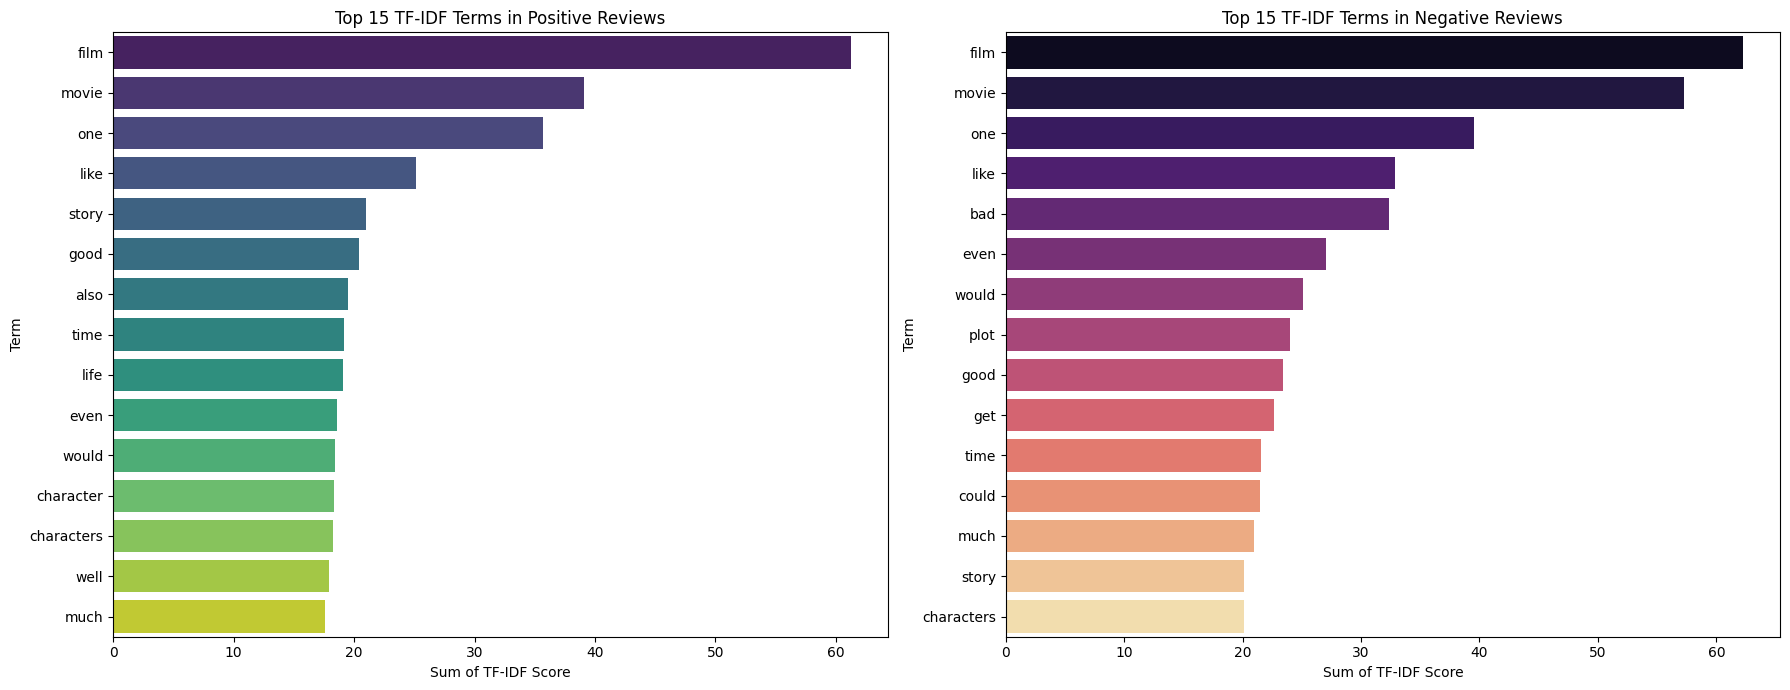

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Convert the list of top terms and scores into pandas DataFrames for easier plotting
df_pos_terms = pd.DataFrame(top_15_pos_terms, columns=['Term', 'TF-IDF Score'])
df_neg_terms = pd.DataFrame(top_15_neg_terms, columns=['Term', 'TF-IDF Score'])

# Create a figure and a set of subplots for side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot for positive reviews
# Sort values by TF-IDF score in descending order for clear visualization
sns.barplot(x='TF-IDF Score', y='Term', data=df_pos_terms.sort_values(by='TF-IDF Score', ascending=False), ax=axes[0], palette='viridis')
axes[0].set_title('Top 15 TF-IDF Terms in Positive Reviews')
axes[0].set_xlabel('Sum of TF-IDF Score')
axes[0].set_ylabel('Term')

# Plot for negative reviews
# Sort values by TF-IDF score in descending order
sns.barplot(x='TF-IDF Score', y='Term', data=df_neg_terms.sort_values(by='TF-IDF Score', ascending=False), ax=axes[1], palette='magma')
axes[1].set_title('Top 15 TF-IDF Terms in Negative Reviews')
axes[1].set_xlabel('Sum of TF-IDF Score')
axes[1].set_ylabel('Term')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()
# Display the plots
plt.show()